In [6]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [8]:
cohort = "test0"

data_method = "test0_data"
eval_method = "test0_eval"

scene = "mid_gate"

courses = ["traverse"]   

roster = [
    # "hsCameron",
    # "hsDavion",
    "hsKurita",
    # "hsLiao",
    # "hsSteiner",
    # "clanGhostBear",
    # "clanJadeFalcon",
    # "clanNovaCat",
    # "clanSmokeJaguar"
    ]

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Output()

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

======================================================================
Cohort : test0          Network: commNet
======================================================================
----------------------------------------------------------------------
Student: hsKurita   | Epochs: 200   | Data Size: 15000.0/2100.0               
Time: 0h 29m 4s     | Train: 0.0015 | Test: 0.0045 | Eval TTE: 0.08
======================================================================

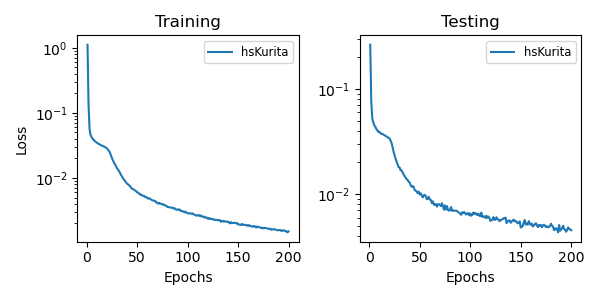

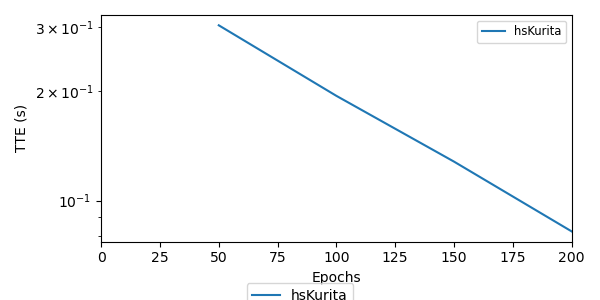

In [9]:
# # Train the Policy
# # tp.train_roster(cohort,yroster,"commNet",200)
# tp.train_roster(cohort,roster,"commNet",200,
#                 use_deploy=scene,deploy_method=eval_method,lim_sv=50)

pl.plot_losses(cohort,roster,"commNet",use_log=True)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Plotting trajectories for expert...

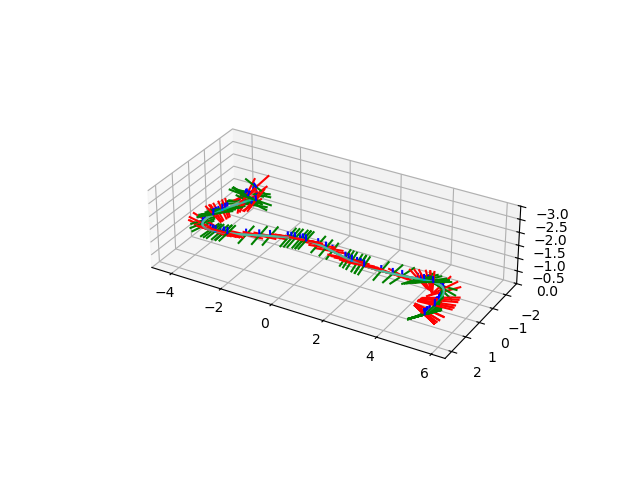

Plotting trajectories for hsKurita...

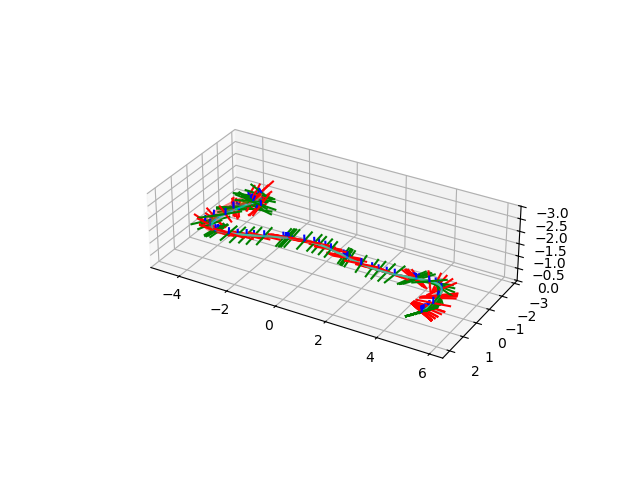

                      Deployment Summary                      
┏━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot    ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert   │   0.11   │   0.10   │ 0.99 │ 197.96  │  79.32   │
│ hsKurita │   0.09   │   0.05   │ 0.94 │ 592.19  │  123.38  │
└──────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [10]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)